In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()
#There are very few observations with class=1 so the dataset is imbalanced

0    284315
1       492
Name: Class, dtype: int64

In [6]:
#The Fraud ratio in dataset is 0,17%
492/(284315+492)

0.001727485630620034

In [7]:
df.describe()
# Values are standardized except Time and Amount feature

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Some plots of th features 

<AxesSubplot:xlabel='V10', ylabel='Density'>

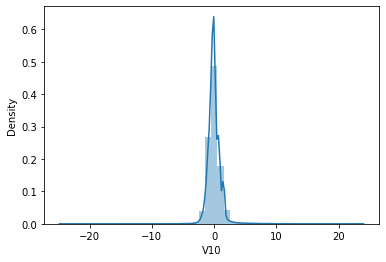

In [8]:
sns.distplot(df['V10'])

<AxesSubplot:>

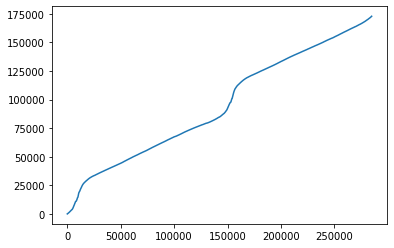

In [9]:
df['Time'].plot()

<AxesSubplot:xlabel='Class', ylabel='count'>

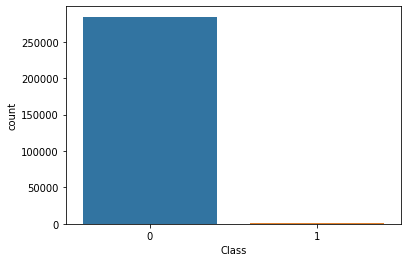

In [10]:
sns.countplot('Class',data=df)

<AxesSubplot:xlabel='Class', ylabel='Time'>

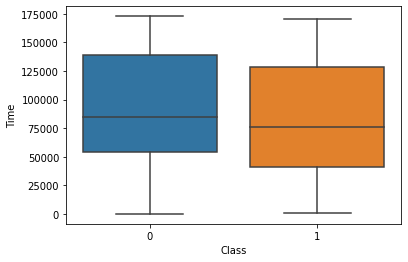

In [11]:
sns.boxplot(x='Class',y='Time',data=df)

## Estimation of the correlation of features with target class

In [12]:
correlations=df.corr()['Class'].sort_values(ascending=True)

In [13]:
correlations

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

## Try to drop features with less than 1% correrlation with the target class

In [14]:
correlations[np.abs(correlations)<0.01]

V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
Name: Class, dtype: float64

### I made a list with features with lesser impact in target class from this list the Amount feature is excluded due to its imporrtance in interpetabillity of the model

In [15]:
less_than_1_per=correlations[np.abs(correlations)<0.01].index
less_than_1_per=list(less_than_1_per)
less_than_1_per.remove('Amount')


<AxesSubplot:xlabel='Amount', ylabel='Density'>

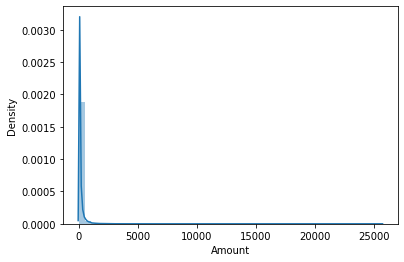

In [16]:
sns.distplot(df['Amount'])
# Seems that there are some outlies that distort the normal distribution i will examine if an extraordinary amouny is a trait for Fraud detection

In [17]:
non_top_1_percent=df.sort_values('Amount',ascending=False).iloc[2843:]

In [18]:
top_1_percent=df.sort_values('Amount',ascending=False).iloc[:2843]

In [19]:
non_top_1_percent.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
201254,133798.0,-4.007587,-2.548032,-2.087865,0.713848,0.607723,0.249243,3.477859,-1.332341,-0.796800,...,-0.624721,0.878300,-2.499900,0.625306,1.237302,0.487553,1.437565,-0.804277,1018.92,0
41524,40720.0,-0.632450,-3.852757,-0.991574,-0.060709,-1.842309,-0.104187,0.897556,-0.291651,-1.116460,...,0.239675,-1.015353,-0.835305,0.339910,-0.156074,1.364999,-0.277015,0.156310,1018.56,0
147864,89090.0,-3.810758,-5.669052,-0.084135,0.939464,0.158454,-0.463210,1.679570,-0.074844,0.376615,...,1.165832,0.869702,2.808006,-0.484611,-0.340199,-0.351239,-0.377263,0.130733,1018.43,0
212156,138740.0,0.151725,-3.706082,-3.695211,0.053871,0.059866,0.612137,1.629445,-0.396961,-1.644184,...,0.632243,0.295981,-0.954899,-1.267431,-0.053260,1.010230,-0.257989,0.060308,1018.12,0
116603,74352.0,-0.546840,-3.574421,-1.010817,0.361947,-1.790978,-0.670527,1.201988,-0.628334,-1.104386,...,0.177554,-1.119236,-0.910621,0.530796,0.104126,0.979523,-0.251801,0.176773,1018.00,0


<AxesSubplot:xlabel='Amount', ylabel='Density'>

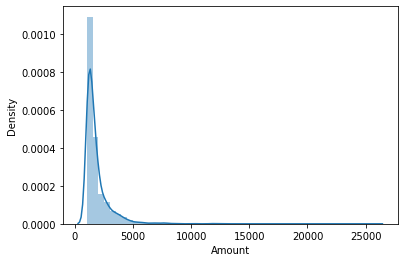

In [20]:
sns.distplot(top_1_percent['Amount'])

In [21]:
top_1_percent['Class'].value_counts()

0    2834
1       9
Name: Class, dtype: int64

In [22]:
# There is a greater possibillity greater than 50% to detect a fraud in top 1% transections 0,31% while in whole dataset is 0,17%
9/(2834+9)

0.0031656700668308124

<AxesSubplot:xlabel='Amount', ylabel='Density'>

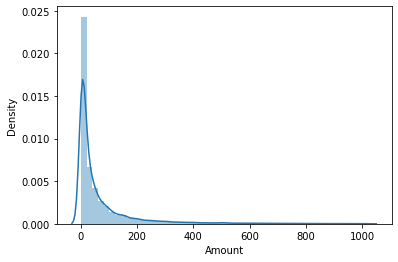

In [23]:
sns.distplot(non_top_1_percent['Amount'])

In [24]:
non_top_1_percent['Class'].value_counts()

0    281481
1       483
Name: Class, dtype: int64

In [25]:
print(f'The fraud percentage is {483/(281481+481)}')

The fraud percentage is 0.0017129967868010584


## Creation of Input and output data

In [26]:
X=df.drop(['Class','Time'],axis=1)

In [27]:
X.head()
# First are excluded Class feature becausse is our output and Time feature because it doent seem to be helpful at all.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## Exception of less important features which are pointed before

In [28]:
X=X.drop([col for col in less_than_1_per],axis=1)

In [29]:
y=df['Class']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [32]:
amount_train=X_train['Amount']
amount_test=X_test['Amount']

In [33]:
X_train.drop(['Amount'],axis=1,inplace=True)

In [34]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27'],
      dtype='object')

In [35]:
X_test.drop(['Amount'],axis=1,inplace=True)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
amount_train=amount_train.to_frame()


In [38]:
type(amount_train)

pandas.core.frame.DataFrame

In [39]:
type(amount_train)

pandas.core.frame.DataFrame

In [40]:
amount_train=scaler.fit_transform(amount_train)

In [41]:
amount_test=amount_test.to_frame()

In [42]:
amount_test=scaler.transform(amount_test)

In [43]:
X_train=pd.DataFrame(X_train,columns=X_train.columns)
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27
67272,-0.560323,-0.776761,1.105988,0.237552,-1.236754,1.267584,0.835155,0.240408,0.203461,-0.649972,0.823380,1.379962,-0.503265,-0.577029,0.263871,-0.157448,1.449746,0.855425,0.238931,0.130347
44511,-1.019096,-1.021164,1.312984,-1.288101,-1.113579,0.802883,-0.801852,0.960937,-0.637524,-0.415742,0.941135,0.520242,-0.468098,0.743074,0.864505,-1.779680,-0.278217,0.245711,0.353554,-0.101620
22394,-7.137241,3.799934,-5.517560,1.372624,-4.448657,-1.368829,-2.434390,4.561890,-0.158596,0.683715,-1.689454,0.994840,3.755933,0.512264,2.096125,-0.200179,-0.498720,-0.135018,0.239425,0.208924
134844,0.891284,-0.549022,1.426302,1.552364,-0.793653,1.547212,-1.008682,0.635713,1.157398,-0.248470,0.809535,1.498966,-0.583592,-0.868176,0.530740,-0.523451,-0.404293,-0.120975,0.184468,0.111138
226901,-0.598832,0.287477,1.485450,-1.543188,0.404097,-0.121273,0.652477,-0.148879,0.720258,-0.853597,-1.351434,-0.150633,-0.716386,0.700096,-1.178334,0.084648,-1.470695,-0.156214,0.245484,-0.209814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239824,1.864738,0.349884,-0.823092,3.752670,0.550320,0.433512,0.096870,0.065013,-0.875944,1.561639,-0.182837,0.236297,0.299982,0.624471,-0.788151,0.071374,-0.981979,-0.287820,0.178476,-0.040184
172551,-1.039229,0.043211,-1.026388,-0.890686,1.026210,-1.592149,1.630840,-0.297277,-0.200117,0.007850,0.686615,-0.210730,1.188933,-0.444013,-0.497777,0.209579,0.029285,0.102251,0.283987,0.474231
255646,2.236032,-0.739854,-1.717042,-1.246837,0.022351,-0.326758,-0.459003,-0.165235,-0.797061,1.035338,0.527765,-0.056733,0.125729,1.279024,-0.371317,-0.593614,0.962716,0.045332,0.440203,-0.047275
135747,-6.524911,5.391220,-2.617160,-0.727893,-2.934678,-0.850936,-2.107395,3.375257,1.236093,3.175949,0.992555,1.932225,1.515452,0.582779,0.758067,-0.334610,-0.652053,1.338578,-0.325101,1.053036


In [44]:
X_train['Amount']=amount_train
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Amount
67272,-0.560323,-0.776761,1.105988,0.237552,-1.236754,1.267584,0.835155,0.240408,0.203461,-0.649972,...,1.379962,-0.503265,-0.577029,0.263871,-0.157448,1.449746,0.855425,0.238931,0.130347,1.067023
44511,-1.019096,-1.021164,1.312984,-1.288101,-1.113579,0.802883,-0.801852,0.960937,-0.637524,-0.415742,...,0.520242,-0.468098,0.743074,0.864505,-1.779680,-0.278217,0.245711,0.353554,-0.101620,0.266326
22394,-7.137241,3.799934,-5.517560,1.372624,-4.448657,-1.368829,-2.434390,4.561890,-0.158596,0.683715,...,0.994840,3.755933,0.512264,2.096125,-0.200179,-0.498720,-0.135018,0.239425,0.208924,0.008673
134844,0.891284,-0.549022,1.426302,1.552364,-0.793653,1.547212,-1.008682,0.635713,1.157398,-0.248470,...,1.498966,-0.583592,-0.868176,0.530740,-0.523451,-0.404293,-0.120975,0.184468,0.111138,-0.121772
226901,-0.598832,0.287477,1.485450,-1.543188,0.404097,-0.121273,0.652477,-0.148879,0.720258,-0.853597,...,-0.150633,-0.716386,0.700096,-1.178334,0.084648,-1.470695,-0.156214,0.245484,-0.209814,-0.237305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239824,1.864738,0.349884,-0.823092,3.752670,0.550320,0.433512,0.096870,0.065013,-0.875944,1.561639,...,0.236297,0.299982,0.624471,-0.788151,0.071374,-0.981979,-0.287820,0.178476,-0.040184,-0.266761
172551,-1.039229,0.043211,-1.026388,-0.890686,1.026210,-1.592149,1.630840,-0.297277,-0.200117,0.007850,...,-0.210730,1.188933,-0.444013,-0.497777,0.209579,0.029285,0.102251,0.283987,0.474231,0.271283
255646,2.236032,-0.739854,-1.717042,-1.246837,0.022351,-0.326758,-0.459003,-0.165235,-0.797061,1.035338,...,-0.056733,0.125729,1.279024,-0.371317,-0.593614,0.962716,0.045332,0.440203,-0.047275,-0.298553
135747,-6.524911,5.391220,-2.617160,-0.727893,-2.934678,-0.850936,-2.107395,3.375257,1.236093,3.175949,...,1.932225,1.515452,0.582779,0.758067,-0.334610,-0.652053,1.338578,-0.325101,1.053036,-0.321414


In [45]:
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [46]:
X_test['Amount']=amount_test

In [47]:
X_test.shape

(93987, 21)

In [48]:
X_train=X_train.values
y_train=y_train.values

In [49]:
X_test=X_test.values
y_test=y_test.values


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
model=Sequential()

model.add(Dense(21,activation='relu'))


model.add(Dense(11,activation='relu'))
model.add(Dense(6,activation='relu'))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [52]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)

In [53]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/100
5964/5964 [==============================] - 8s 1ms/step - loss: 0.0125 - val_loss: 0.0036
Epoch 2/100
5964/5964 [==============================] - 7s 1ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 3/100
5964/5964 [==============================] - 7s 1ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 4/100
5964/5964 [==============================] - 7s 1ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 5/100
5964/5964 [==============================] - 7s 1ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 6/100
5964/5964 [==============================] - 7s 1ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 7/100
5964/5964 [==============================] - 7s 1ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 8/100
5964/5964 [==============================] - 7s 1ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 9/100
5964/5964 [==============================] - 7s 1ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 10/100
5964/5964 [==============================] - 7s 1ms/step - l

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
predictions=model.predict_classes(X_test)

In [56]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93829
           1       0.91      0.77      0.83       158

    accuracy                           1.00     93987
   macro avg       0.95      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



In [57]:
# Predictions with DROPOUT
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93829
           1       0.91      0.77      0.83       158

    accuracy                           1.00     93987
   macro avg       0.95      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



In [58]:
print(confusion_matrix(y_test,predictions))

[[93817    12]
 [   37   121]]
